<a href="https://colab.research.google.com/github/anishb77/Tensorflow-Projects/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this experiment, I've been learning about CNNs and want to see what an example would look like in practice. I'm not going to focus on working with data for this project either (I want to focus more on the actual CNN) so I will use the cars196 dataset from Tensorflow's datasets package.

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #added this later to make it easier to write code
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() #load data and split into train and test datasets

#condense pixel values into the range of 0-1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0] #this is what one image looks like in matrices

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

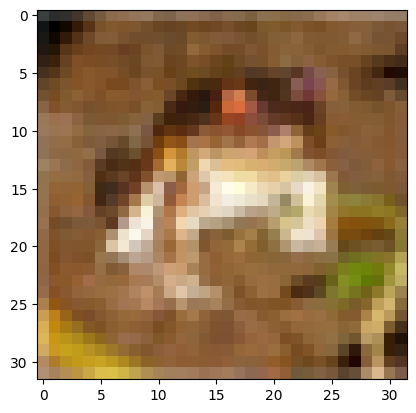

In [15]:
plt.imshow(x_train[0])
plt.show() #visualization of the same image

Now that all the dataset-related work is done, it's time to configure the model. I've done some research on CNNs by now and the way they use convolution maps to understand the features of an image and identify lines and shapes is really interesting. I think the maps are what the optimizers will actually train. I'm just gonna use the same optimizer (adam) and backpropogation algorithm (sparsecategoricalcrossentropy) as I did with MNIST since the problem is similar in its core.

As for the layer structure itself, I'm gonna use a common structure of alternating between normal convolutional maps and maxpooling functions to be efficient while still sensing all the general features of the image.

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))

model.add(layers.Flatten()) #DNN at the end for the actual classification
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

#used a tutorial for formatting properly and understanding what goes where
#decided to try increasing how many maps are used per layer as the image got shrunk down, let's see how costly it will be

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
#just defining what optimizer and loss functions will be used

Now that the model is properly defined, it's time to train it and see how it performs!

In [21]:
model.fit(x_train, y_train, epochs = 4) #only ran 4 epochs because this takes so long to train

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.2971 - loss: 1.8900
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5650 - loss: 1.2271
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6350 - loss: 1.0301
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6761 - loss: 0.9218


```
Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.2971 - loss: 1.8900
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5650 - loss: 1.2271
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6350 - loss: 1.0301
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6761 - loss: 0.9218
<keras.src.callbacks.history.History at 0x7f2b353fcfe0>

```



In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6814 - loss: 0.9158
0.9252656102180481 0.6777999997138977



```
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6814 - loss: 0.9158
0.9252656102180481 0.6777999997138977

```



Overall, I was pretty disappointed with this result, but apparently for these types of models this is a normal result. Using a pretrained base is the best option for quality, as normally good image recognition models are trained on thousands, sometimes even millions of images. So yeah, I will definitely try that next time and see for myself if this is true, although it probably is.
This experiment still taught me a lot about how CNNs work in concept, how images are represented in data, and understanding what model architecture works best for this case and why just because of the research I did prior to this.

I'm not done here, though. Next time I want to actually try and load in my own data to understand the challenges of working with unpolished datasets and how to overcome them, as well as understanding how pretrained bases can improve the quality of a model.